#### Implementacja bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Implementacja NPP $-$ czasy oczekiwania na kolejny skok

In [13]:
def func(T, N):
    T_N = []
    for i in range(N):
        t = 0
        S_I = []
        I = 0
        while t <= T:
            u = np.random.uniform()
            t += (1+t)/np.sqrt(1-u) - 1 - t
            S_I.append(t)
        T_N.append(S_I)
    return T_N

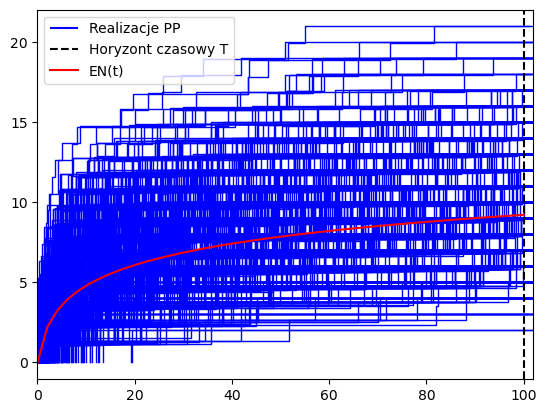

In [14]:
N = 1000
T = 100

data = func(T,N)

for i in range(N):
    plt.step(data[i], np.linspace(0,len(data[i]),len(data[i])),linewidth=1, color='b')
plt.hlines(0,0,0.001, color='b', label='Realizacje PP')
plt.xlim(0,T+2)
plt.axvline(x = T, label='Horyzont czasowy T', linestyle='dashed', color='k')
x = np.linspace(0,T)
plt.plot(x, 2*np.log(1+x), color='r', label='EN(t)')
plt.legend()
plt.show()

#### Metoda Rozrzedzenia, $\lambda = t^{2}$

In [9]:
def Thinning(T, N):
    l = T**2
    T_I = []
    for i in range(N):
        S_I = [0]
        t = 0
        I = 0
        while t <= T:
            u1 = np.random.uniform()
            t -= 1/l * np.log(u1)
            u2 = np.random.uniform()
            if u2 <= t**2/l:
                I += 1
                S_I.append(t)
        T_I.append(S_I)        
    return T_I

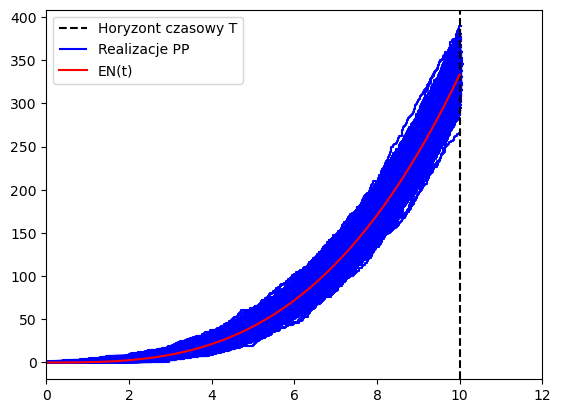

In [10]:
T = 10
N = 1000

data = Thinning(T,N)
for i in range(len(data)):
    plt.step(data[i], np.linspace(0,len(data[i]),len(data[i])), color='b')
plt.xlim(0,T+2)
plt.axvline(x = T, label='Horyzont czasowy T', linestyle='dashed', color='k')
plt.hlines(0,0,0.001, color='b', label='Realizacje PP')
x = np.linspace(0,T)
plt.plot(x, x**3/3, color='r', label='EN(t)')
plt.legend()
plt.show()